# 6. 차원 축소

In [1]:
# 구글 드라이브와 연결
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 01. 차원 축소(Dimension Reduction) 개요

**차원 축소** : 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성  
- 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있고, 학습 데이터의 크기가 줄어 학습에 필요한 처리 능력도 줄일 수 있다.

**< 피처 선택(feature selection)** & **피처 추출(feature extraction) >**

- **피처 선택** : 불필요한 피처는 제거하고 데이터의 특징을 잘 나타내는 피처만 선택.  
→ 기존 피처를 저차원의 중요 피처로 압축해서 추출하기 때문에 기존 피처와는 완전히 다른 값이 됨

- **피처 추출** : 피처를 함축적으로 더 잘 설명할 수 있는 다른 공간으로 매핑해 추출.  
→ 기존 피처가 인지하기 어려웠던 잠재적인 요소(Latent Factor)를 추출할 수 있음

차원축소의 대표적인 알고리즘 - **PCA, LDA, SVD, NMF**

- 매우 많은 차원을 가지고 있는 이미지나 텍스트에서 차원 축소를 통해 잠재적인 의미를 찾아주는 데 활용

- **이미지 변환 압축**
- **텍스트의 숨겨진 의미 추출** - SVD, NMF로 Semantic Topic 모델링

## 02. PCA(Principal Component Analysis) - 주성분 분석

### PCA 개요

가장 대표적인 차원 축소 기법

가장 높은 분산을 가지는 데이터의 축(**주성분**)을 찾아 그 축으로 차원을 축소한다.  
(분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주)

- 키, 몸무게 두 개의 피처를 가지고 있는 데이터 세트를 한 개의 주성분을 가진 데이터 세트로 차원 축소


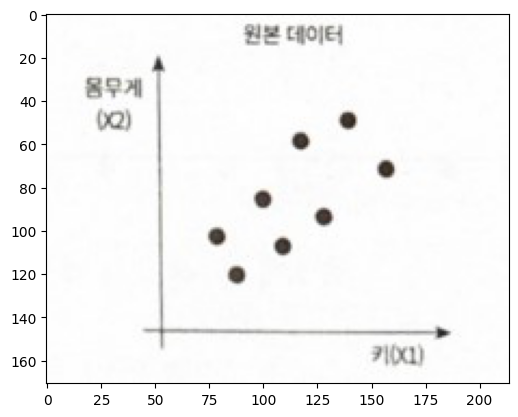

In [27]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/PCA개요.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- 데이터의 변동성이 가장 큰 방향으로 축을 생성하고 새롭게 생성된 축으로 데이터를 투영


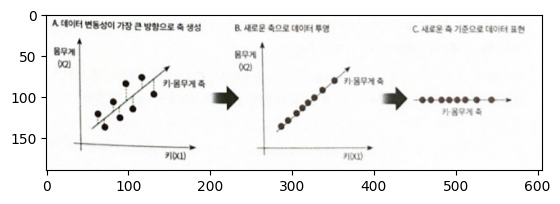

In [28]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/PCA방법.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

1. 가장 큰 데이터 변동성(Variance)를 기반으로 첫 번째 벡터 축 생성
2. 1의 벡터 축에 직각이 되는 벡터 축 생성
3. 2의 벡터 축에 직각이 되는 벡터 축 생성

- 이렇게 생성된 벡터 축에 원본 데이터 투영 → 벡터 축의 개수만큼의 차원으로 원본 데이터 차원 축소


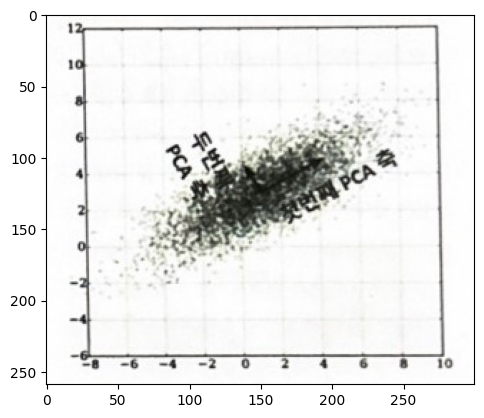

In [29]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/PCA방법2.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

PCA는 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법


**< 선형대수 관점에서 해석 >**
- 입력 데이터의 공분산 행렬을 고유값 분해하고, 고유벡터에 입력 데이터를 선형 변환
- 고유 벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타낸다.
- 고유값은 고유벡터의 크기와 입력 데이터의 분산을 나타낸다.

**선형변환** : 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환 → 행렬을 공간으로 가정

분산 : 한 개의 특정한 변수의 데이터 변동

공분산 : 두 변수간의 변동 → Cov(X, Y) > 0 양의 상관관계

**공분산 행렬** : 여러 변수와 관련된 공분산을 포함하는 정방형 행렬
- 정방 행렬 : 열 = 행
- 대칭 행렬 : 정방행렬 중 대각원소를 중심으로 값이 대칭인 행렬  
→ 대칭 행렬은 항상 고유벡터를 직교 행렬로, 고유값을 정방행렬로 대각화할 수 있다

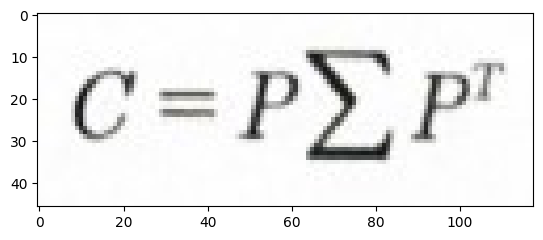

In [31]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/공분산행렬.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- P : n x n의 직교행렬  
-Σ : n x n 정방행렬
- P^T : 행렬 P의 전치 행렬

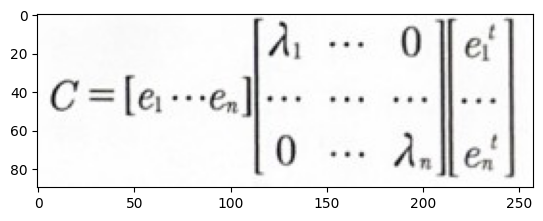

In [45]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/공분산행렬분해.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

공분산 C = 고유벡터 직교 행렬 X 고유값 정방 행렬 X 고유벡터 직교 행렬의 전치 행렬

- ei : i번째 고유 벡터
- λi : i번째 고유벡터의 크기
- e1 : 가장 분산이 큰 방향을 가진 고유벡터
- e2 : e1에 수직, 2번째로 분산이 큰 방향을 가진 고유벡터

**PCA** : 입력 데이터의 공분산 행렬을 고유벡터와 고유값으로 분해하고 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식  

1. 입력 데이터 세트의 공분산 행렬 생성
2. 공분산 행렬의 고유벡터와 고유값 계산
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수)만큼 고유벡터 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

iris 데이터의 4개 속성을 2개의 PCA 차원으로 압축

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head() 

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


각 품종에 따라 원본 데이터가 어떻게 분포되어 있는지 2차원으로 시각화  
sepal length - X 축 / sepal width - Y 축

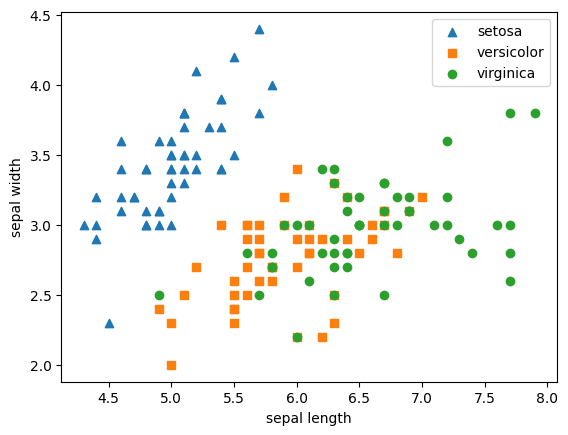

In [3]:
# setosa는 세모, versicolor 네모, virginica 동그라미
markers=['^', 's', 'o']

# 타겟 값 - setosa 0, versicolor 1, virginica 2
for i, marker in enumerate(markers):
    x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show() 

setosa는 일정하게 분포 / versicolor, virginica는 분류가 어려운 복잡한 조건  
PCA로 4개 속성을 2개로 압축한 뒤 2차원 시각화  


바로 PCA를 적용하기 전에 개별 속성을 스케일링 해야함  
→ 사이킷런 StandardScaler를 이용해 표준정규분포로 속성값 변환

In [4]:
from sklearn.preprocessing import StandardScaler
iris_scaled=StandardScaler().fit_transform(irisDF) 

스케일링된 데이터에 PCA 적용

In [5]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 변환
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape) 

(150, 2)


In [6]:
# PCA 변환된 데이터의 칼럼명을 pca_component_1, pca_component_2
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head() 

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0


2개 속성으로 PCA 변환된 데이터를 2차원 시각화  
pca_component_1 - X축 / pca_component_2 - Y축 

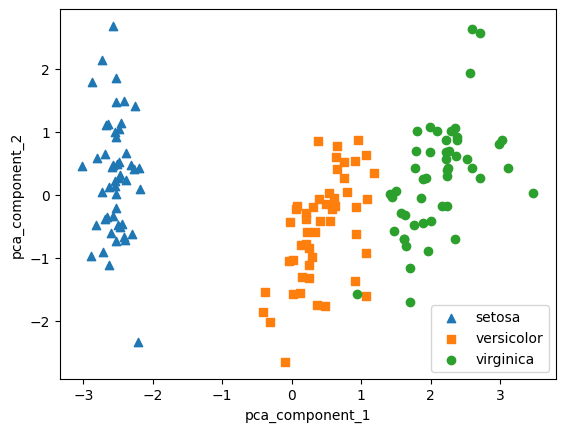

In [7]:
# setosa 세모, versicolor 네모, virginica 동그라미
markers=['^', 's', 'o']

# 산점도
for i, marker in enumerate(markers):
    x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show() 

pca_component_1이 원본 데이터의 변동성을 매우 잘 반영했기 때문에 명확히 분리됨  
**explained_varianceratio 속성** : 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공

In [8]:
print(pca.explained_variance_ratio_) 

[0.76740358 0.18282727]


component_1이 전체 변동성의 76%를 차지  
→ PCA를 두개 요소로만 변환해도 원본 데이터 세트의 95%의 변동성을 설명할 수 있음

원본 데이터와 PCA 데이터에 각각 분류를 적용하고 결과 비교  
→ estimator는 랜덤포레스트 이용 cross_val_score로 3개 교차 검증 세트로 비교

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


기존 4차원 데이터를 2차원으로 변환한 PCA 데이터를 랜덤 포레스트에 적용

In [34]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.98 0.98 1.  ]
PCA 변환 데이터 평균 정확도: 0.9866666666666667


보통은 PCA 변환된 데이터가 원본 데이터보다 더 낮은 예측도가 나옴  
고차원의 데이터를 저차원의 데이터로 변환하면 직관적으로 이해하기 쉽고, 데이터의 주축을 이루는 성분이 무엇인지 쉽게 파악할 수 있음

iris보다 더 많은 피처를 가진 데이터를 PCA로 변환한 뒤 예측 영향도가 어떻게 변하는지 확인


In [38]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('/content/drive/My Drive/CUAI_BASIC/pca_credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


default - 연체 1, 정상 0  
pay_0 을 pay_1로 변경  
default 칼럼명이 너무 길어서 default로 변경하고 y_target 변수로 별도 저장  
default를 제외한 나머지 피처는 별도의 DataFrame으로 생성  

In [39]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [40]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

각 속성 간 상관도를 구하고 seaborn 의 heatmap으로 시각화

<Axes: >

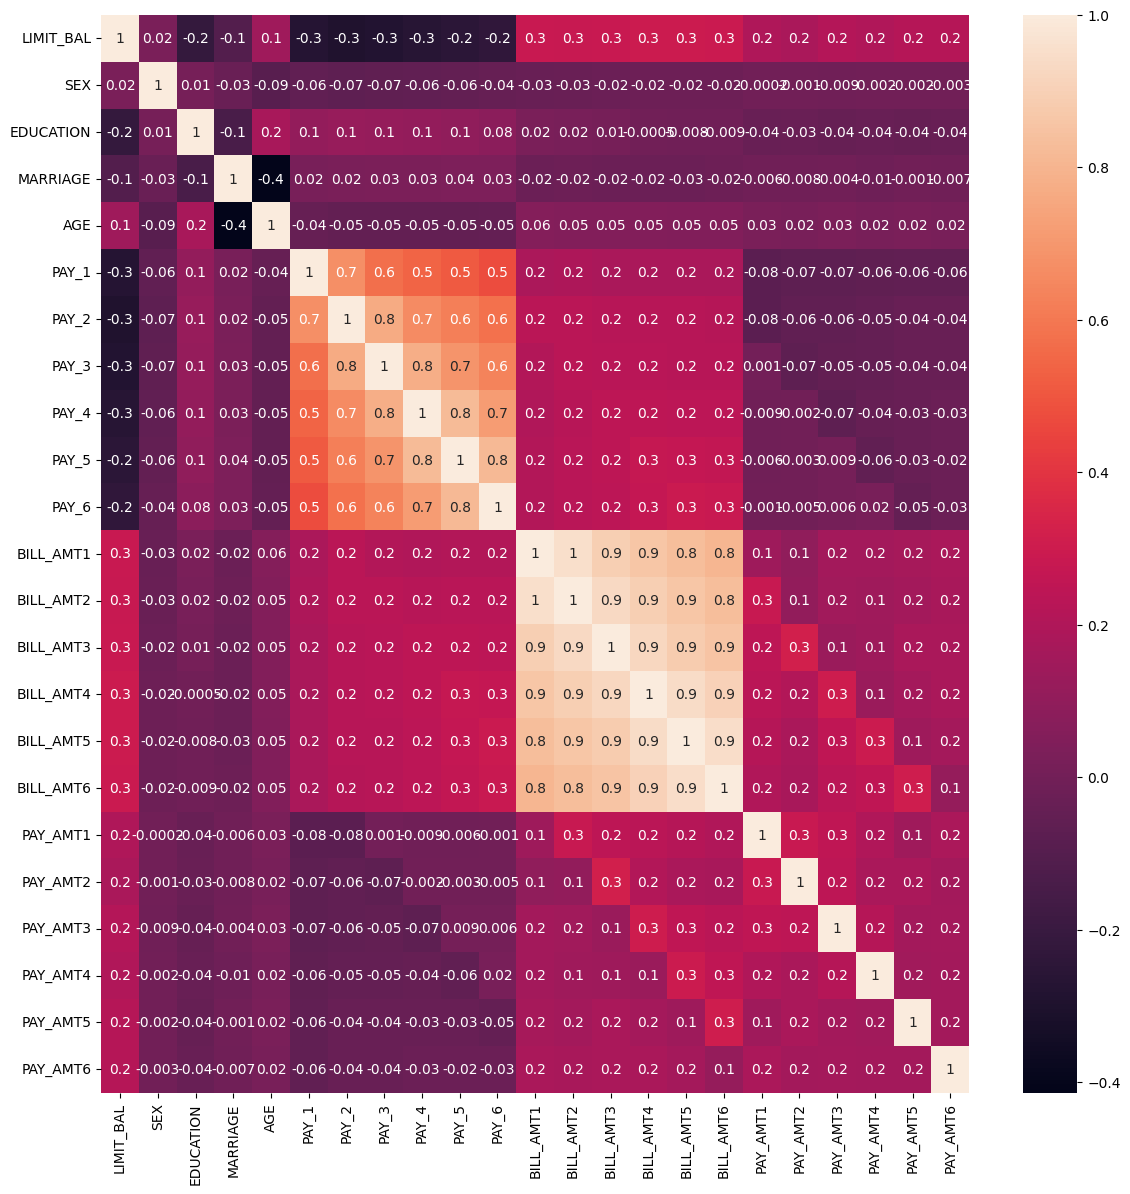

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g') 

BILL_AMT1 ~ BILL_AMT6 까지 6개 속성끼리 대부분의 상관도가 0.9 이상으로 매우 높다  
PAY_1 ~ PAY_6 사이도 상관도가 높음  


BILL_AMT1 ~ BILL_AMT6 속성을 2개의 컴포넌트로 PCA 변환하고 개별 컴포넌트의 변동성을 알아봄

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT 6개의 속성명 생성
cols_bill=['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체를 생성, explained variance ratio 계산을 위한 fit 호출
scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_features[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_) 

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


단 2개의 PCA 컴포넌트 만으로도 95%의 변동성을 설명할 수 있음.


원본 데이터와 PCA 변환한 데이터 세트의 분류 예측 결과 비교  
랜덤포레스트로 디폴드 값 3개의 교차 검증 세트로 분류 예측

In [43]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(n_estimators=300, random_state=156)
scores=cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우 개별 폴드 세트별 정확도', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores))) 

CV=3인 경우 개별 폴드 세트별 정확도 [0.8083 0.8196 0.8232]
평균 정확도:0.8170


3개의 교차 검증 세트의 평균 예측 정확도 81%  
6개 컴포넌트로 PCA 변환한 데이터에서 분류 예측 적용

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 StandardScaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환 수행 > cross_val_score 로 분류 예측
pca=PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)
scores_pca=cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우 PCA 변환된 개별 폴드 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))  

CV=3인 경우 PCA 변환된 개별 폴드 세트별 정확도: [0.7908 0.7969 0.802 ]
PCA 변환 데이터 세트 평균 정확도:0.7966


전체 속성의 1/4 수준인 6개 컴포넌트 만으로도 원본 데이터를 기반으로 한 분류 예측결과보다 1 ~ 2% 밖에 성능 저하가 안됨  
→ PCA 압축 능력 좋음


PCA 차원축소를 통해 데이터를 쉽게 인지하는 데 사용할 수 있음.  
→ 특히 컴퓨터 비전 분야에서 활발하게 사용  
→ 얼굴 인식의 경우 Eigen-face라는 PCA 변환으로 원본 얼굴 이미지를 변환해 사용하는 경우가 많음

## 03. LDA (Linear Discriminant Analysis) - 선형 판별 분석법

지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 유지하며 차원축소

- 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음

- 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 **클래스 간 분산(between-class scatter)**과 **클래스 내부 분산(within-class scatter)** 비율을 최대화하는 방식으로 차원 축소


→ 클래스 간 분산은 최대한 **크게**, 클래스 내부 분산은 최대한 **작게**  



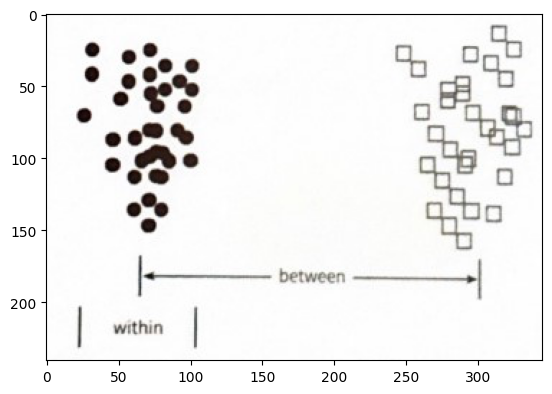

In [46]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/LDA개요.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

1. 클래스 내부와 클래스 간 분산 행렬 계산
2. 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터를 기반으로 구함.


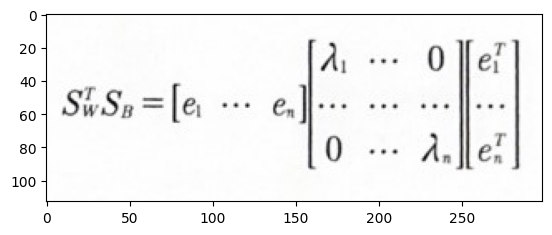

In [50]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/LDA분해.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

3. 클래스 내부 분산 행렬을 Sw, 클래스 간 분산 행렬 Sn이라고 한다면 두 행렬을 고유벡터로 분해할 수 있음
4. 고유값이 가장 큰 순으로 K개(LDA 변환 차수만큼) 추출
5. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

### 붓꽃 데이터 세트에 LDA 적용하기

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris=load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data) 

2개의 컴포넌트로 LDA 변환  
PCA: 비지도학습 / LDA: 지도학습  


클래스의 결정 값이 변환시 필요함. lda 객체의 fit 메서드를 호출할 때 결정값이 입력됨

In [13]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda=lda.transform(iris_scaled)
print(iris_lda.shape) 

(150, 2)


LDA 변환된 데이터를 2차원 시각화

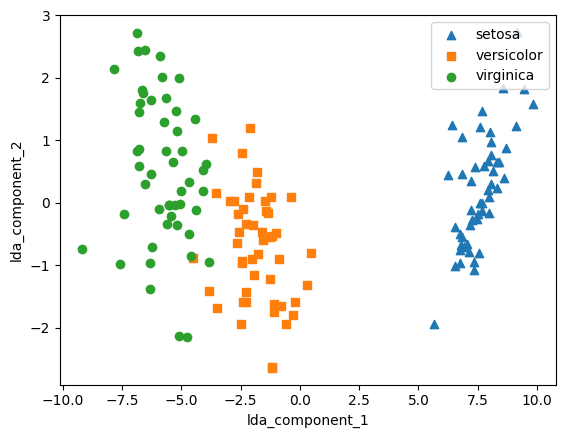

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1', 'lda_component_2']
irisDF_lda=pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

# setosa 세모, versicolor 네모, virginica 동그라미
markers=['^', 's', 'o']

# 타겟 값 - setosa 0 , versicolor 1 , virginica 2
for i, marker in enumerate(markers):
    x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i]) 

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show() 

LDA로 변환된 붓꽃 데이터 세트를 시각화해보면 PCA로 변환된 데이터와 좌우 대칭 형태로 많이 닮아 있음

## 04. SVD(Singular Value Decomposition) - 특이값 분해

SVD는 정방형행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있음

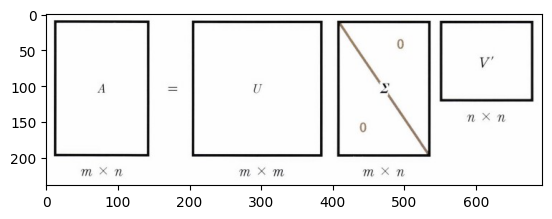

In [52]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/SVD분해1.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- 일반적으로 Σ의 비대각 부분과 대각원소중 특이값이 0인 부분도 모두 제거된 Σ에 대응하는 U, V의 원소도 함께 제거해 **차원을 줄인 형태로 SVD 적용**
- A(mxn)일 때 U(mxp), Σ(pxp), VT(pxn) 으로 분해

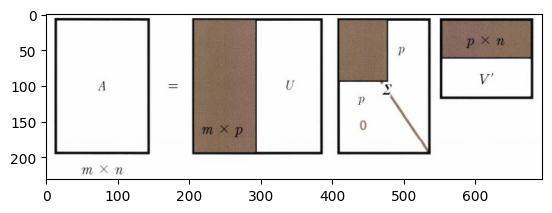

In [53]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/SVD분해2.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- Truncated SVD는 Σ의 대각원소 중 상위 몇 개만 추출해서 대응하는 U, V의 원소도 함께 제거해 차원 축소
- 일반적인 SVD는 넘파이나 사이파이를 이용해 수행

넘파이의 SVD를 이용해 SVD 연산 수행 → SVD로 분해가 어떤 식으로 수행되는지 확인


In [15]:
# 넘파이 SVD 모듈 numpy.linalg.svd > 4x4 넘파이 행렬 생성
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a
np.random.seed(121)
a=np.random.randn(4,4)
print(np.round(a,3)) 

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


행렬 a에 SVD를 적용해 U, Σ, Vt 도출  
numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U행렬 Σ행렬 V전치행렬 반환

→ Σ행렬의 경우 대각에 위치한 값만 0이 아니고 나머지는 0이므로, 0이 아닌 값만 1차원 행렬로 반환

In [16]:
U, Sigma, Vt=svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix : \n', np.round(U,3)) 
print('Sigma matrix : \n', np.round(Sigma, 3))
print('V transpose matrix : \n', np.round(Vt, 3)) 

(4, 4) (4,) (4, 4)
U matrix : 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma matrix : 
 [3.423 2.023 0.463 0.079]
V transpose matrix : 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


분해된 행렬이 다시 원본 행렬로 정확히 복원되는지 확인  

원본 행렬로 복원은 내적 하면 됨  
→ Σ의 경우 0이 아닌 값만 추출했기 때문에 0을 포함한 대칭행렬로 변환한 뒤에 내적 수행해야함

In [17]:
# Sigma를 다시 0을 포함한 대칭 행렬로 변환
Sigma_mat=np.diag(Sigma)
a_=np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3)) 

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


데이터 로우 간 의존성이 있는 경우 Σ값이 어떻게 변하고, 이에 따른 차원축소가 진행될 수 있는지 확인

일부러 의존성을 주기 위해 a행렬의 '3번째 행=첫번째행+두번째행'으로 설정 '4번째 행=첫번째 행'

In [18]:
a[2]=a[0]+a[1]
a[3]=a[0]
print(np.round(a, 3)) 

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


로우간 관계가 높아진 a행렬을 다시 SVD로 분해

In [19]:
U, Sigma, Vt=svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value: \n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value: 
 [2.663 0.807 0.    0.   ]


이전과 크기는 같지만 Σ 값 중 2개가 0으로 변함 == 선형 독립인 로우 벡터 개수가 2개(Rank(a)=2)  

Σ의 0에 대응되는 U, Sigma, Vt의 데이터를 제외하고 복원  
→ U행렬 중 선행 2개의 열만 추출, Vt 선행 2개만 추출해 복원

In [20]:
# U는  Σ와 내적을 수행하기 때문에  Σ의 앞 2개 열만 추출
U_=U[:, :2]
Sigma_=np.diag(Sigma[:2])

# Vt는 앞2행 추출
Vt_=Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, Vt의 내적 > 원본 행렬 복원
a_=np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3)) 

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


**Truncated SVD 사용** → Σ행렬에 있는 대각원소(특이값 중 상위 일부) 데이터만 추출해 분해하는 방식  
인위적으로 더 작은 차원의 U, Σ, Vt로 분해하기 때문에 원본 행렬을 정확히 복원할 수는 없음

원래 차수에 가깝게 잘라낼수록 원본 행렬에 더 가깝게 복원할 수 있음

In [21]:
# Truncated SVD는 사이파이에서만 지원됨
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬 출력, SVD를 적용할 경우 U, Sigma, Vt 차원 확인
np.random.seed(121)
matrix=np.random.random((6,6))
print('원본 행렬: \n', matrix)
U, Sigma, Vt=svd(matrix, full_matrices=False)
print('\n 분해 행렬 차원: ', U.shape, Sigma.shape, Vt.shape)
print('\n Sigma 값 행렬: ', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 수행
num_components=4
U_tr, Sigma_tr, Vt_tr=svds(matrix, k=num_components)
print('\n Truncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\n Truncated SVD Sigma 값 행렬: ', Sigma_tr)
matrix_tr=np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print('\n Truncated SVD로 분해 후 복원한 행렬: \n', matrix_tr) 

원본 행렬: 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

 분해 행렬 차원:  (6, 6) (6,) (6, 6)

 Sigma 값 행렬:  [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

 Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

 Truncated SVD Sigma 값 행렬:  [0.55463089 0.83865238 0.88116505 3.2535007 ]

 Truncated SVD로 분해 후 복원한 행렬: 
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.9386868

6x6 행렬을 SVD로 분해하면 각각 (6,6) (6, ) (6,6) 차원이지만  
Truncated SVD의 n_components=4로 설정하면 (6,4) (4, ) (4,6)으로 분해

따라서 완벽하게 복원되지 않고 **근사적으로 복원됨**

### 사이킷런 Truncated SVD 클래스를 이용한 변환

PCA와 유사하게 fit, transform을 이용해 원본 데이터를 몇 개의 주요 컴포넌트로 차원을 축소해 변환

- 원본 데이터를 Truncated SVD 방식으로 분해된 U*Sigma 행렬에 선형 변환해 생성

iris 데이터 세트를 Truncated SVD로 변환


Text(0, 0.5, 'TruncatedSVD Component 2')

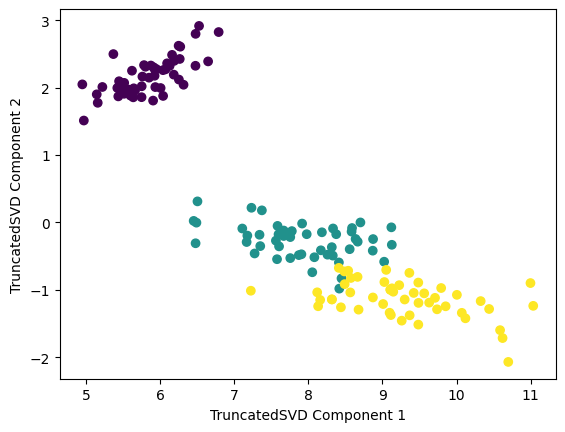

In [22]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd=tsvd.transform(iris_ftrs)

# 산점도 표현 > 품종 색으로 구분
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2') 

Text(0.5, 1.0, 'PCA Transformed')

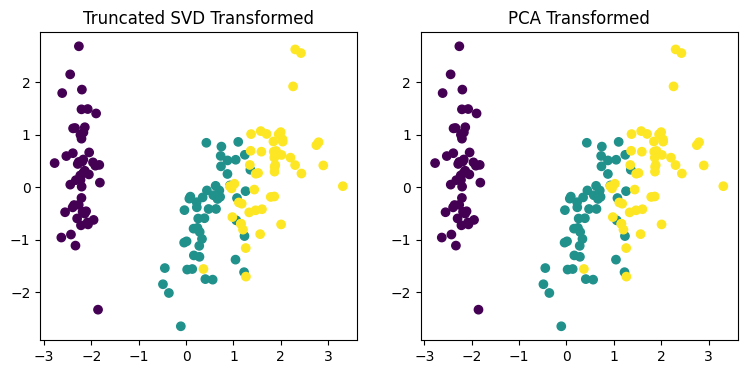

In [23]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed') 

TruncatedSVD와 PCA 모두 변환후 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음 / 두 클래스 모두 SVD를 이용해 행렬 분해

In [24]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean()) 

2.3364990497931616e-15
2.0816681711721685e-17


모두 0에 가까운 값임 → 2개의 변환이 서로 동일함!


PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능 / SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능


SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용  
텍스트의 토픽 모델링 기법인 LSA(Latent Semantic Analysis)의 기반 알고리즘

## 05. NMF(Non-Negative Matrix Factorization)

낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형

- 원본 행렬 내의 모든 원소 값이 모두 양수(0이상)라는 게 보장되면 더 간단히 두 개의 기반 양수 행렬로 분해될 수 있는 기법



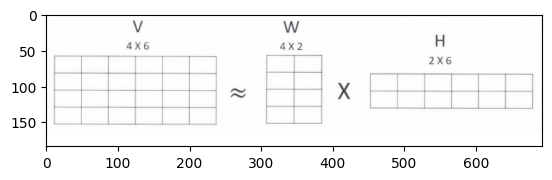

In [54]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/NMF개요.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- 4x6 원본 행렬 V는 4x2 행렬 W, 2x6 행렬 H 두개로 근사해 분해될 수 있다.

**행렬 분해(Matrix Factorization)**는 일반적으로 SVD와 같은 행렬 분해 기법을 통칭

- 행렬 분해를 하게 되면 W, H 행렬은 일반적으로 가늘고 긴 행렬과 넓고 작은 행렬로 분해된다.

- 분해된 행렬은 잠재 요소를 특정을 가지게 됨

→ 분해 행렬 W는 원본 행에 대해 잠재요소의 값이 얼마나 되는지에 대응  
→ 분해 행렬 H는 잠재요소가 원본 열로 어떻게 구성됐는지 나타냄

NMF는 차원 축소를 통한 잠재 요소 도출로, 이미지 변환 및 압축, 텍스트의 토픽 도출 등에서 사용

사이킷런에서 NMF 클래스를 통해 사용 → iris 데이터를 NMF로 2개 컴포넌트로 변환하고 시각화


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

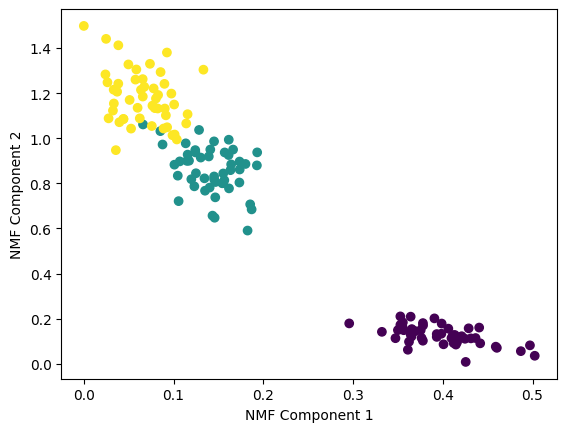

In [25]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data
nmf=NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf=nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2') 

NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도, 클러스터링에 사용된다. 영화 추천과 같은 추천 영역에 활발하게 적용

**잠재요소(Latent Factoring) 기반의 추천 방식** :
사용자의 상품 평가 데이터 세트인 사용자-평가순위(user-Rating) 데이터 세트를 행렬 분해 기법을 통해 분해하면서 사용자가 평가하지 않은 상품에 대한 잠재요소를 추출해 이를 통한 평가순위(Rating)을 예측하고 높은 순위로 예측된 상품을 추천해주는 방식
